In [3]:
import csv
import numpy as np 
import pandas as pd

df=pd.read_csv('camp_teach.csv')
df

,TX,TG,id,age_rz,GENDER,ETHNIC,hemog,PREFEV,PREFVC,PREFF,...,POSFVCPP,wbc,agehome,anypet,woodstove,dehumid,parent_smokes,any_smokes,visitc,fdays
0,ned,B,1,5,m,o,12.5,1.38,1.75,79.0,...,95.0,65.0,50.0,1.0,2.0,2.0,1.0,1.0,0,0
1,ned,B,1,5,m,o,NaN,1.31,1.70,77.0,...,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,68
2,ned,B,1,5,m,o,NaN,1.44,1.76,82.0,...,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,175
3,ned,B,1,5,m,o,NaN,1.48,1.76,84.0,...,83.0,NaN,25.0,1.0,2.0,2.0,1.0,1.0,12,370
4,ned,B,1,5,m,o,NaN,1.44,1.79,80.0,...,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9942,pned,C,1041,6,f,w,NaN,2.10,2.35,89.0,...,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,1256
9943,pned,C,1041,6,f,w,13.4,1.99,2.33,85.0,...,95.0,42.0,40.0,1.0,2.0,2.0,2.0,2.0,48,1486
9944,pned,C,1041,6,f,w,NaN,2.83,3.05,93.0,...,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,2270
9945,pned,C,1041,6,f,w,NaN,3.03,3.22,94.0,...,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,3005


In [4]:
missing_value=(df.isnull().sum())
print(missing_value)
print()


TX                  0
TG                  0
id                  0
age_rz              0
GENDER              0
ETHNIC              0
hemog            8650
PREFEV             31
PREFVC             31
PREFF              31
PREPF              80
POSFEV             37
POSFVC             37
POSFF              37
POSPF             100
PREFEVPP           39
PREFVCPP           39
POSFEVPP           45
POSFVCPP           45
wbc              8699
agehome          6828
anypet           6776
woodstove        6779
dehumid          6786
parent_smokes    6777
any_smokes       6777
visitc              0
fdays               0
dtype: int64



In [5]:
total_missing = df.isnull().sum().sum()
print("The total missing values is : ",total_missing)
total_cells = df.size 
missing_percentage_overall = (total_missing / total_cells) * 100
print(f"Overall percentage of missing data: {missing_percentage_overall:.2f}%")

The total missing values is :  58624
Overall percentage of missing data: 21.05%


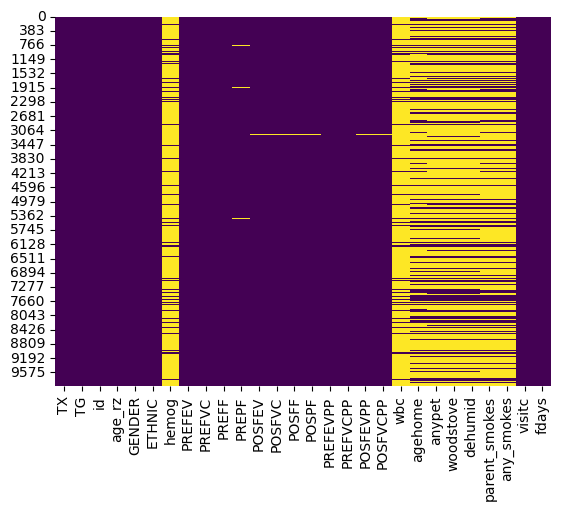

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [7]:

from sklearn.impute import KNNImputer

# Load the dataset
file_path = "camp_teach.csv"  # Ensure this is the correct path
data = pd.read_csv(file_path)

# Drop columns with more than 50% missing values
threshold = len(data) * 0.5
data_cleaned = data.dropna(axis=1, thresh=threshold)

# Prepare data for KNN: KNNImputer works with numerical data, so factorize categorical columns
categorical_columns = data_cleaned.select_dtypes(include='object').columns
for column in categorical_columns:
    data_cleaned[column], _ = pd.factorize(data_cleaned[column])

# Apply KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors based on your specific dataset
data_cleaned_imputed = pd.DataFrame(knn_imputer.fit_transform(data_cleaned), columns=data_cleaned.columns)

# Decode categorical variables if they were factorized
for column in categorical_columns:
    # Assuming original data is available to map back the factorized values
    original_map = dict(enumerate(data[column].dropna().unique()))
    data_cleaned_imputed[column] = data_cleaned_imputed[column].round().map(original_map)

# Save the cleaned dataset to a new file
cleaned_file_path = "camp_teach_cleaned_knn.csv"
data_cleaned_imputed.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset with KNN imputation saved to {cleaned_file_path}")


Cleaned dataset with KNN imputation saved to camp_teach_cleaned_knn.csv


/var/folders/5h/mxtsvcv51qn2k6n4bqb3v8h40000gn/T/ipykernel_1200/1166202655.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column], _ = pd.factorize(data_cleaned[column])
/var/folders/5h/mxtsvcv51qn2k6n4bqb3v8h40000gn/T/ipykernel_1200/1166202655.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column], _ = pd.factorize(data_cleaned[column])
/var/folders/5h/mxtsvcv51qn2k6n4bqb3v8h40000gn/T/ipykernel_1200/1166202655.py:14: SettingWithCopyWarning: 
A value is trying to be set

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Function to process data and evaluate model accuracy
def process_and_evaluate(data, target_column):
    # Drop rows with missing target values
    data = data.dropna(subset=[target_column])
    
    # Separate features and target
    features = data.drop(columns=[target_column])
    target = data[target_column]
    
    # Handle missing values in features
    features = features.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna(x.mode()[0]))
    
    # Encode categorical variables
    label_encoders = {}
    for column in features.select_dtypes(include='object').columns:
        le = LabelEncoder()
        features[column] = le.fit_transform(features[column].astype(str))
        label_encoders[column] = le
    
    # Encode the target column if needed
    if target.dtype == 'object':
        le_target = LabelEncoder()
        target = le_target.fit_transform(target)
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
    
    # Train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Load the datasets
data_cleaned = pd.read_csv("camp_teach_cleaned_knn.csv")
data_original = pd.read_csv("camp_teach.csv")

# Specify the target column
target_column = 'visitc'

# Evaluate and print accuracies
accuracy_cleaned = process_and_evaluate(data_cleaned, target_column)
accuracy_original = process_and_evaluate(data_original, target_column)

print(f"Model Accuracy with Cleaned Data: {accuracy_cleaned:.2f}")
print(f"Model Accuracy with Original Data: {accuracy_original:.2f}")


Model Accuracy with Cleaned Data: 0.85
Model Accuracy with Original Data: 0.94


In [9]:
# Load the cleaned dataset
data_cleaned = pd.read_csv("camp_teach_cleaned_knn.csv")

# Function to cap outliers using the IQR method
def cap_outliers(data):
    for column in data.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the outliers
        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    
    return data

# Apply capping to handle outliers
data_cleaned = cap_outliers(data_cleaned)

# Save the dataset after outlier handling
cleaned_with_outliers_handled_path = "camp_teach_cleaned_outliers_handled.csv"
data_cleaned.to_csv(cleaned_with_outliers_handled_path, index=False)

print(f"Dataset with outliers handled saved to {cleaned_with_outliers_handled_path}")

Dataset with outliers handled saved to camp_teach_cleaned_outliers_handled.csv


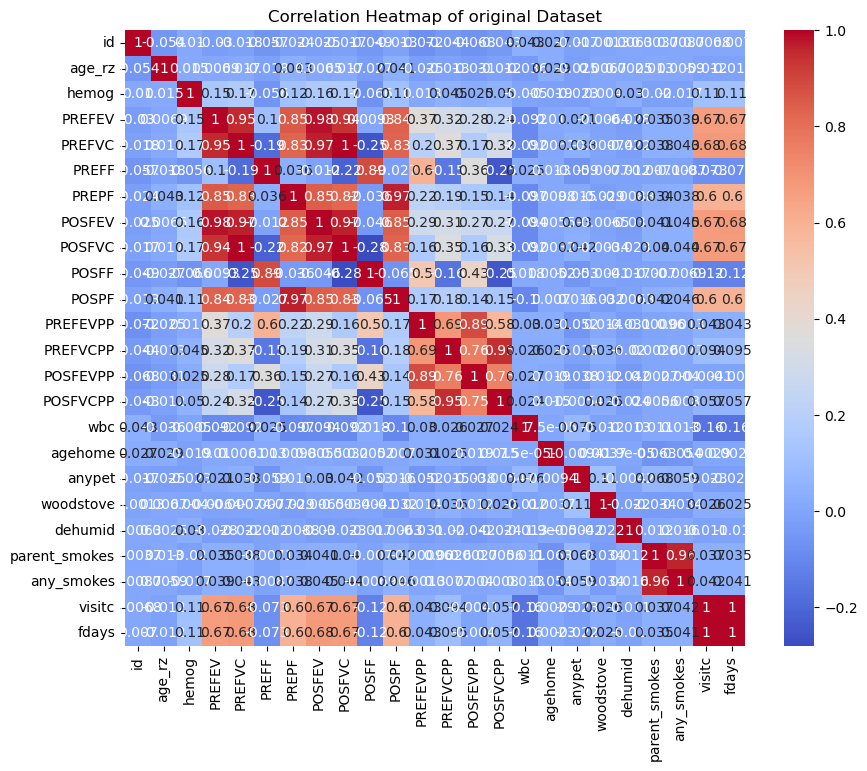

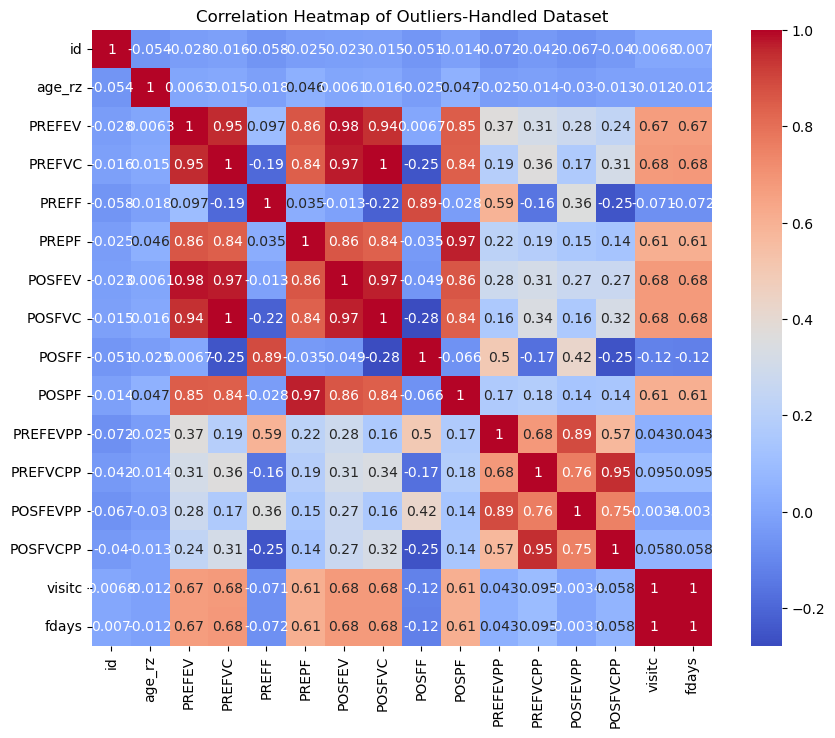

In [10]:
# Load the cleaned dataset
data_cleaned = pd.read_csv("camp_teach.csv")

# Select only numerical columns
numerical_data_cleaned = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Generate the heatmap for the cleaned dataset
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of original Dataset')
plt.show()

# Load the outliers-handled dataset
data_outliers_handled = pd.read_csv("camp_teach_cleaned_outliers_handled.csv")

# Select only numerical columns
numerical_data_outliers_handled = data_outliers_handled.select_dtypes(include=['float64', 'int64'])

# Generate the heatmap for the outliers-handled dataset
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data_outliers_handled.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Outliers-Handled Dataset')
plt.show()

Standardized dataset saved to camp_teach_cleaned_standardized.csv


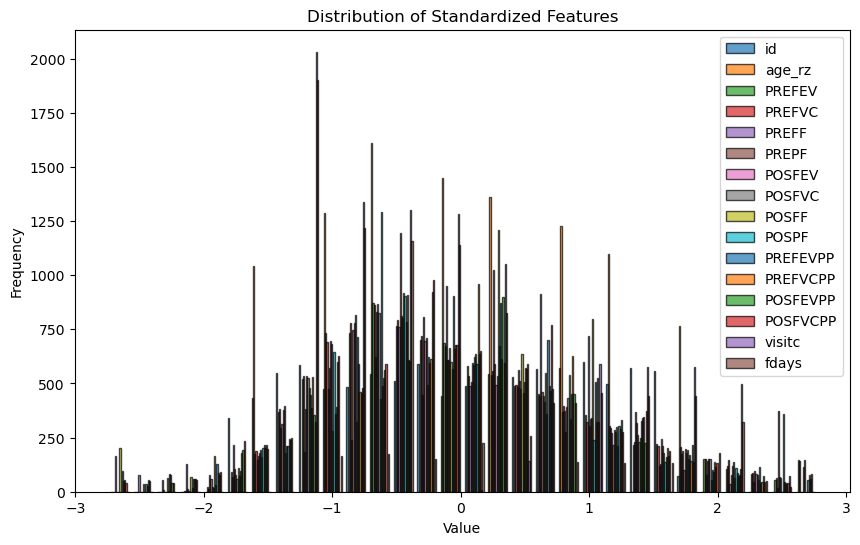

In [11]:

from sklearn.preprocessing import StandardScaler

# Load your cleaned dataset with handled outliers
data_cleaned = pd.read_csv("camp_teach_cleaned_outliers_handled.csv")

# Select only the numerical columns for standardization
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the numerical columns
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Save the standardized dataset to a new file
standardized_file_path = "camp_teach_cleaned_standardized.csv"
data_cleaned.to_csv(standardized_file_path, index=False)

print(f"Standardized dataset saved to {standardized_file_path}")

# Visualization to show the effect of standardization
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned[numerical_columns], bins=30, edgecolor='k', alpha=0.7, label=numerical_columns)
plt.title('Distribution of Standardized Features')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**EDA**


In [13]:
df2=pd.read_csv("camp_teach_cleaned_standardized.csv")
df2.describe().T



,count,mean,std,min,25%,50%,75%,max
id,9947.0,-4.571704e-17,1.00005,-1.753339,-0.874163,0.021539,0.870968,1.684041
age_rz,9947.0,4.028814e-16,1.00005,-1.553201,-0.623701,-0.158950,0.770550,2.164801
PREFEV,9947.0,1.614383e-16,1.00005,-2.227757,-0.763327,-0.182027,0.634030,2.730065
PREFVC,9947.0,-3.485924e-16,1.00005,-2.085710,-0.760430,-0.188741,0.625484,2.704355
PREFF,9947.0,1.399370e-15,1.00005,-2.580038,-0.601619,0.117805,0.717326,2.515888
PREPF,9947.0,1.057206e-16,1.00005,-2.289876,-0.696805,-0.193730,0.560882,2.447414
POSFEV,9947.0,4.314545e-16,1.00005,-2.192417,-0.765987,-0.186834,0.649719,2.773278
POSFVC,9947.0,7.857615e-17,1.00005,-2.182621,-0.760054,-0.187558,0.636490,2.731306
POSFF,9947.0,-8.407649e-16,1.00005,-2.671732,-0.681839,0.055159,0.644757,2.266152
POSPF,9947.0,-3.571643e-18,1.00005,-2.265050,-0.712088,-0.208425,0.547070,2.435808


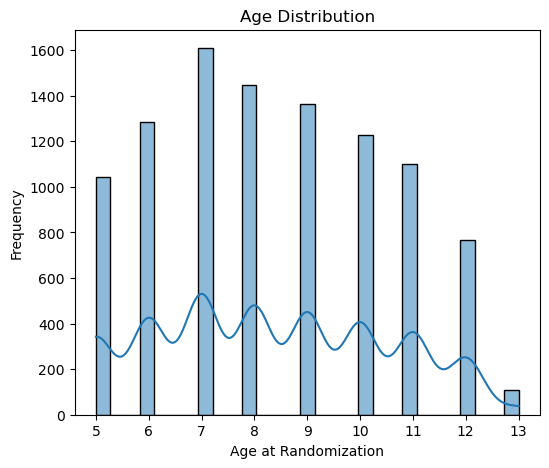

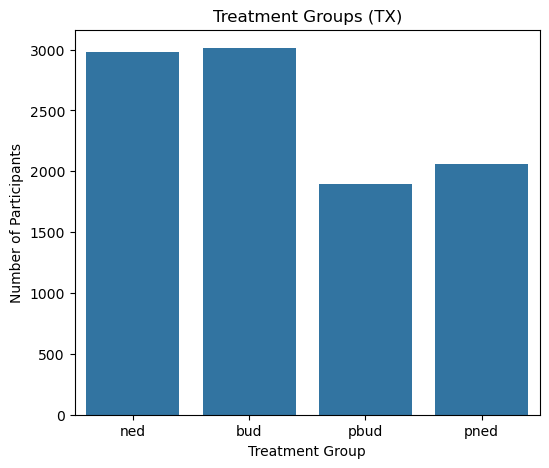

In [14]:
# Age Distribution
plt.figure(figsize=(6, 5))
sns.histplot(df['age_rz'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age at Randomization')
plt.ylabel('Frequency')
plt.show()

# Treatment Group Distribution (TX)
plt.figure(figsize=(6, 5))
sns.countplot(x='TX', data=df)
plt.title('Treatment Groups (TX)')
plt.xlabel('Treatment Group')
plt.ylabel('Number of Participants')
plt.show()

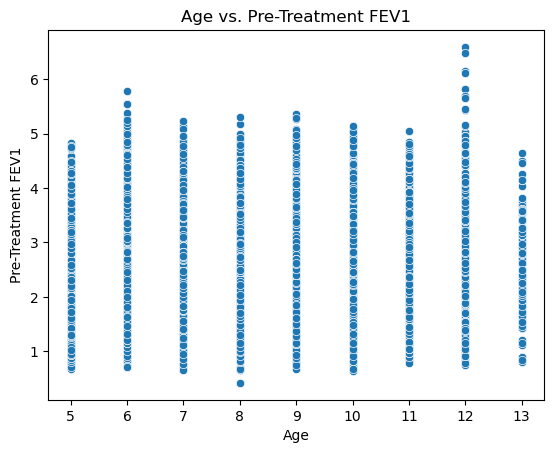

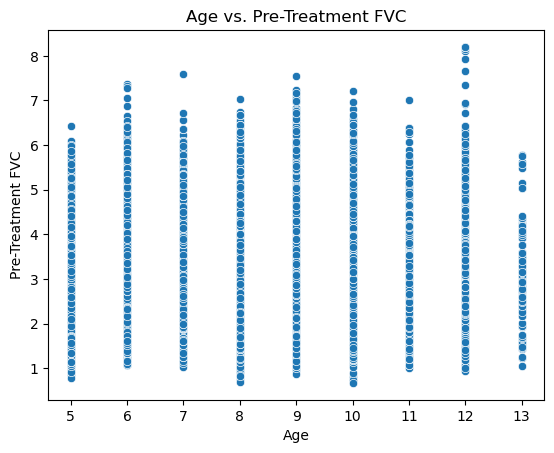

In [15]:
sns.scatterplot(x='age_rz', y='PREFEV', data=df)
plt.title('Age vs. Pre-Treatment FEV1')
plt.xlabel('Age')
plt.ylabel('Pre-Treatment FEV1')
plt.show()

sns.scatterplot(x='age_rz', y='PREFVC', data=df)
plt.title('Age vs. Pre-Treatment FVC')
plt.xlabel('Age')
plt.ylabel('Pre-Treatment FVC')
plt.show()


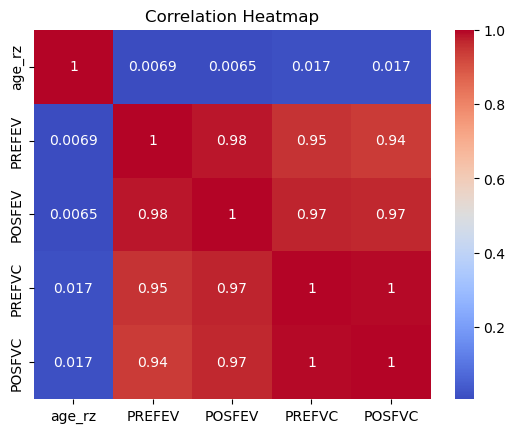

In [16]:
corr_matrix = df[['age_rz', 'PREFEV', 'POSFEV', 'PREFVC', 'POSFVC']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**FEATURE ENGINEERING**

In [18]:
# Create new features that measure the change in lung function (FEV1 and FVC) from pre-treatment to post-treatment
df2=pd.read_csv('camp_teach_cleaned_standardized.csv')

df2['FEV1_Change'] = df2['POSFEV'] - df2['PREFEV']
df2['FVC_Change'] = df2['POSFVC'] - df2['PREFVC']




In [19]:
df2['Age_FEV1_Interaction'] = df2['age_rz'] * df2['PREFEV']
df2['Age_FVC_Interaction'] = df2['age_rz'] * df2['PREFVC']


In [20]:
df2['age_group'] = pd.cut(df2['age_rz'], bins=[5, 7, 9, 11, 13], labels=['5-7', '8-9', '10-11', '12-13'])


In [21]:
from sklearn.decomposition import PCA

lung_function_features = df2[['PREFEV', 'POSFEV', 'PREFVC', 'POSFVC']]
pca = PCA(n_components=2)
pca_components = pca.fit_transform(lung_function_features)
df2['PCA_LungFunction_1'] = pca_components[:, 0]
df2['PCA_LungFunction_2'] = pca_components[:, 1]



In [22]:

# # Identify categorical columns
# categorical_columns = df2.select_dtypes(include=['object']).columns

# # Apply one-hot encoding to these categorical variables
# df2 = pd.get_dummies(df2, columns=categorical_columns, drop_first=True)



**MODELIING**

In [24]:
# Load the cleaned and standardized dataset
df2=pd.read_csv('camp_teach_cleaned_standardized_final.csv')

df2['FEV1_Change'] = df2['POSFEV'] - df2['PREFEV']

df2.to_csv('camp_teach_cleaned_standardized_final.csv', index=False)


In [25]:
# Example: Encoding categorical variables
categorical_columns = df2.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

# Apply one-hot encoding to these categorical variables
df2 = pd.get_dummies(df2, columns=categorical_columns, drop_first=True)

Categorical columns: Index(['TX', 'TG', 'GENDER', 'ETHNIC'], dtype='object')


In [26]:
# Define a threshold for significant improvement in FEV1
threshold_value = 0.2 

# Create the Treatment_Success variable
df2['Treatment_Success'] = (df2['FEV1_Change'] > threshold_value).astype(int)


In [27]:
from sklearn.model_selection import train_test_split

# Features (exclude the target variable)
X = df2.drop(columns=['Treatment_Success'])
# Target variable
y = df2['Treatment_Success']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate Random Forest model
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Mean Squared Error: {rf_mse:.4f}")
print(f"Random Forest R^2 Score: {rf_r2:.4f}")
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.9995
Random Forest Mean Squared Error: 0.0005
Random Forest R^2 Score: 0.9947
Accuracy: 0.9994974874371859
Confusion Matrix:
 [[1781    0]
 [   1  208]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1781
           1       1.00      1.00      1.00       209

    accuracy                           1.00      1990
   macro avg       1.00      1.00      1.00      1990
weighted avg       1.00      1.00      1.00      1990



In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict using the Linear Regression model
y_pred_lr = lr_model.predict(X_test)

# Calculate MSE, RMSE, MAE, R2
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Mean Squared Error (MSE): {lr_mse:.4f}")
print(f"Linear Regression Root Mean Squared Error (RMSE): {lr_rmse:.4f}")
print(f"Linear Regression Mean Absolute Error (MAE): {lr_mae:.4f}")
print(f"Linear Regression R^2 Score: {lr_r2:.4f}")

# Apply a threshold to convert regression output to binary classification
threshold = 0.5  # You can adjust this threshold based on your requirements
y_pred_lr_binary = (y_pred_lr > threshold).astype(int)

# Evaluate the binary classification
lr_accuracy = accuracy_score(y_test, y_pred_lr_binary)
lr_conf_matrix = confusion_matrix(y_test, y_pred_lr_binary)
lr_class_report = classification_report(y_test, y_pred_lr_binary)

# Print the evaluation metrics for binary classification
print(f"Linear Regression Accuracy (after thresholding): {lr_accuracy:.4f}")
print("Confusion Matrix:\n", lr_conf_matrix)
print("Classification Report:\n", lr_class_report)


Linear Regression Mean Squared Error (MSE): 0.0441
Linear Regression Root Mean Squared Error (RMSE): 0.2099
Linear Regression Mean Absolute Error (MAE): 0.1501
Linear Regression R^2 Score: 0.5313
Linear Regression Accuracy (after thresholding): 0.9497
Confusion Matrix:
 [[1780    1]
 [  99  110]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1781
           1       0.99      0.53      0.69       209

    accuracy                           0.95      1990
   macro avg       0.97      0.76      0.83      1990
weighted avg       0.95      0.95      0.94      1990



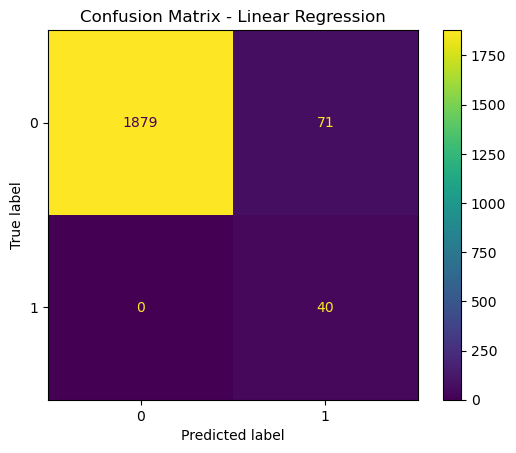

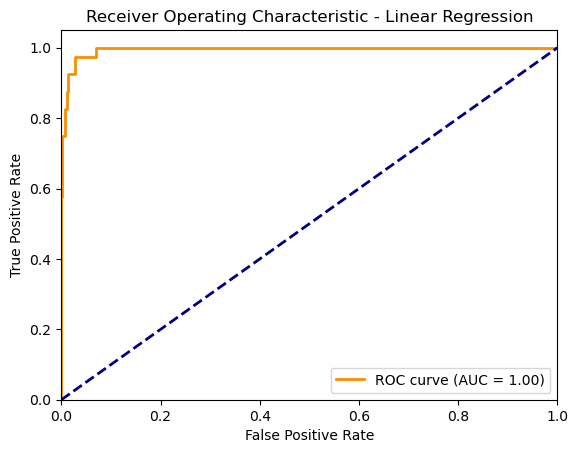

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr_binary)
plt.title('Confusion Matrix - Linear Regression')
plt.show()

# Calculate the ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Linear Regression')
plt.legend(loc='lower right')
plt.show()


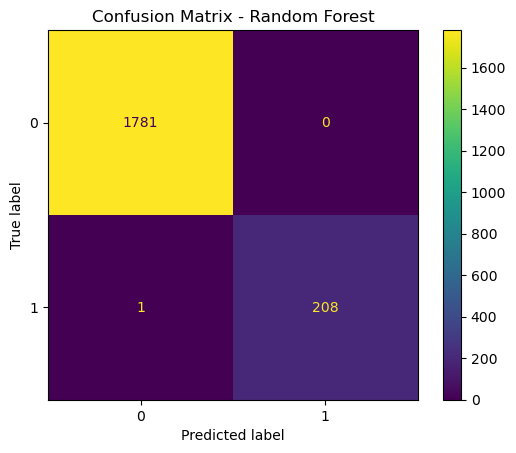

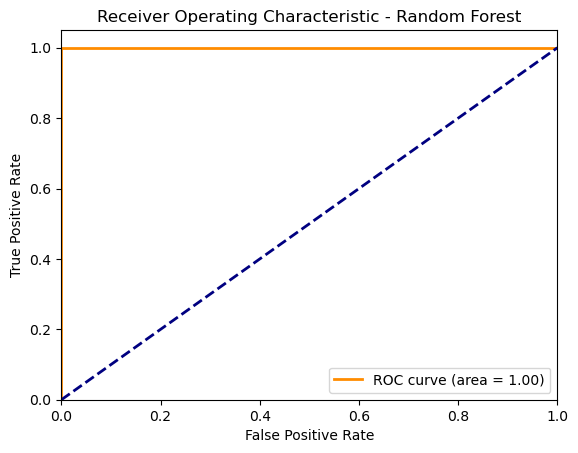

In [31]:

from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Assuming you have already trained your RandomForestClassifier model as 'model'
# and have the test data as X_test and y_test

# Plot the confusion matrix for the Random Forest model
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Calculate and plot the ROC curve for the Random Forest model
y_pred_prob_rf = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.show()


In [32]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Load your dataset
df = pd.read_csv('camp_teach_cleaned_standardized_final.csv')

# Identify categorical columns and apply Label Encoding
categorical_columns = ['TX', 'TG', 'GENDER', 'ETHNIC']  # Replace with actual categorical column names
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Apply KNNImputer to handle missing values after encoding categorical variables
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Convert the continuous target to categorical (binary classification)
threshold = 0.5  # Example threshold; adjust based on your data
target_column = 'FEV1_Change'  # Replace with the actual target variable name
df_imputed['target_binary'] = (df_imputed[target_column] >= threshold).astype(int)

# Define the features and target
X = df_imputed.drop(columns=[target_column, 'target_binary'])  # Use other features for training
y = df_imputed['target_binary']  # Use the binary target for classification

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, 
                                      n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV
rf_random_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_rf_model = rf_random_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_roc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"Best Random Forest Parameters: {rf_random_search.best_params_}")
print(f"Accuracy after hyperparameter tuning: {accuracy_rf:.4f}")
print(f"F1 Score after hyperparameter tuning: {f1_rf:.4f}")
print(f"AUC-ROC after hyperparameter tuning: {auc_roc_rf:.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Random Forest Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Accuracy after hyperparameter tuning: 0.9854
F1 Score after hyperparameter tuning: 0.4528
AUC-ROC after hyperparameter tuning: 0.9908
